In [149]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from collections import Counter

In [150]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

<Axes: >

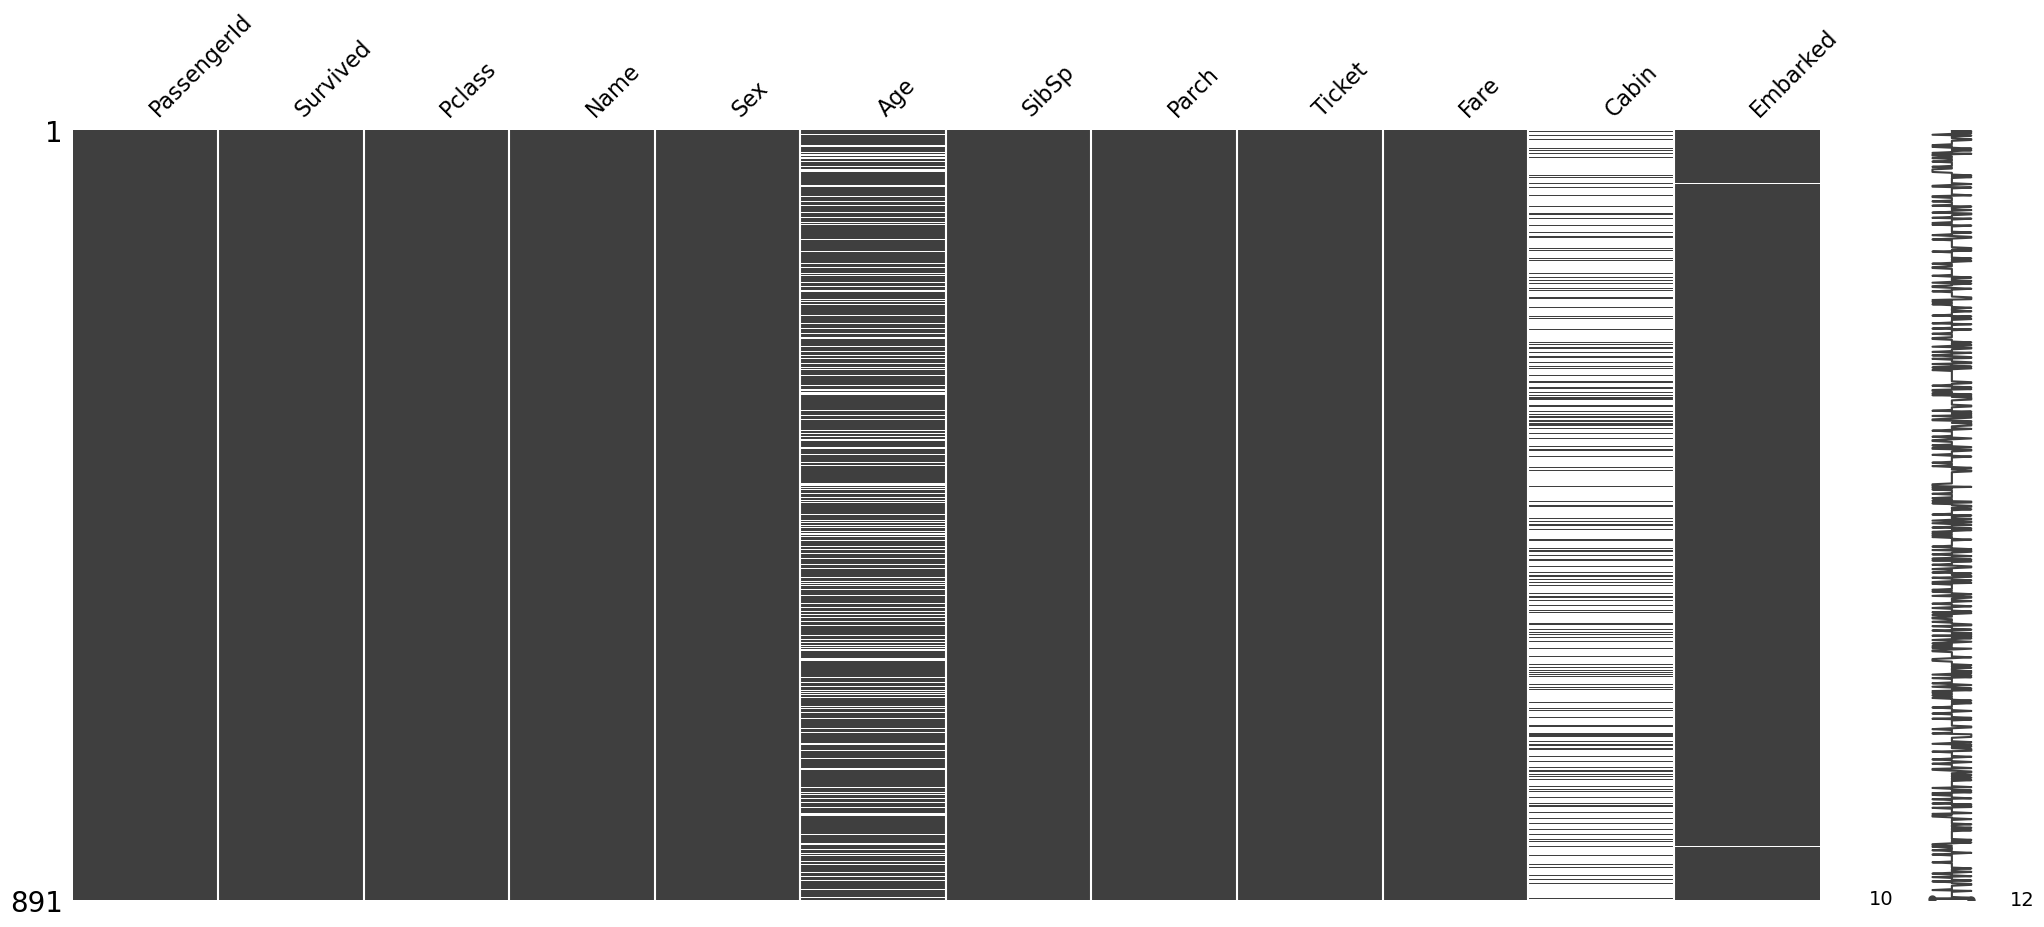

In [151]:
missingno.matrix(train_df)

In [152]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [153]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [154]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [155]:
df_num = train_df[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']]
df_cat = train_df[['Survived','Sex','Ticket','Cabin','Embarked']]

In [156]:
df_num.describe()

,Survived,SibSp,Parch,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,0.383838,0.523008,0.381594,29.699118,32.204208
std,0.486592,1.102743,0.806057,14.526497,49.693429
min,0.000000,0.000000,0.000000,0.420000,0.000000
25%,0.000000,0.000000,0.000000,20.125000,7.910400
50%,0.000000,0.000000,0.000000,28.000000,14.454200
75%,1.000000,1.000000,0.000000,38.000000,31.000000
max,1.000000,8.000000,6.000000,80.000000,512.329200


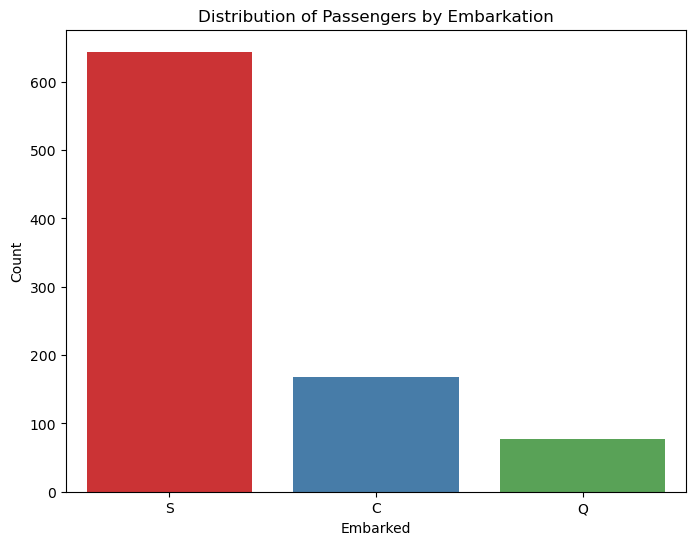

In [157]:

plt.figure(figsize=(8, 6))

sns.countplot(data=df_cat, x='Embarked', palette='Set1')
plt.title('Distribution of Passengers by Embarkation')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

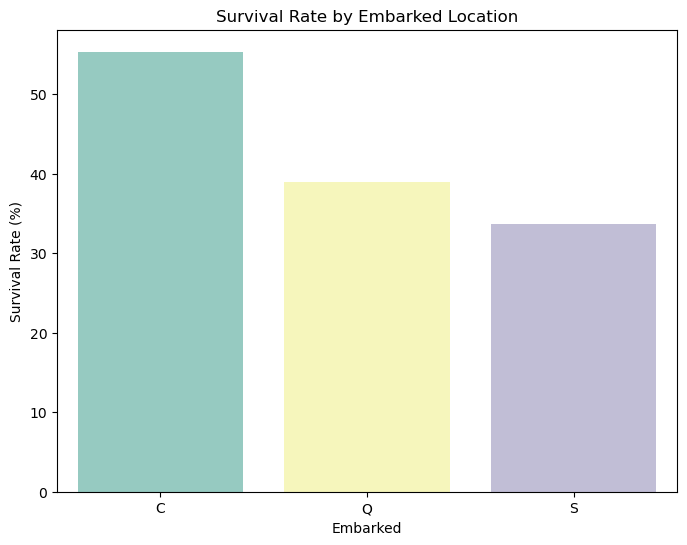

In [158]:

survival_rates =df_cat.groupby('Embarked')['Survived'].mean() * 100

plt.figure(figsize=(8, 6))

sns.barplot(x=survival_rates.index, y=survival_rates.values, palette='Set3')

plt.title('Survival Rate by Embarked Location')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate (%)')

plt.show()

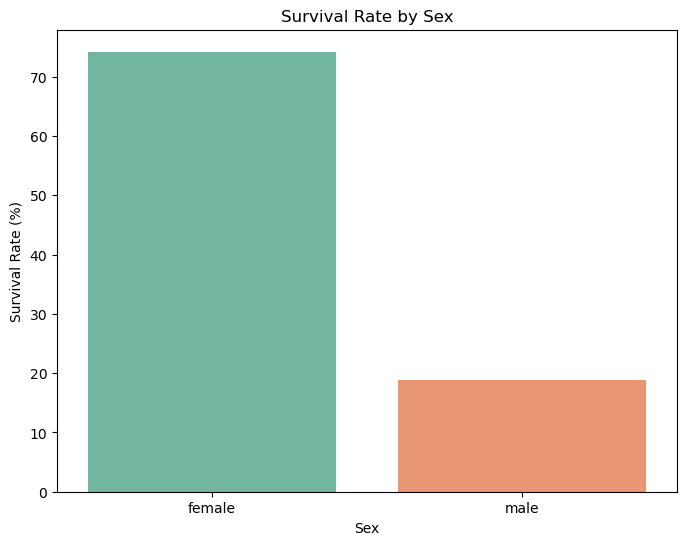

In [159]:

survival_rates =df_cat.groupby('Sex')['Survived'].mean() * 100

plt.figure(figsize=(8, 6))

sns.barplot(x=survival_rates.index, y=survival_rates.values, palette='Set2')

plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')

plt.show()


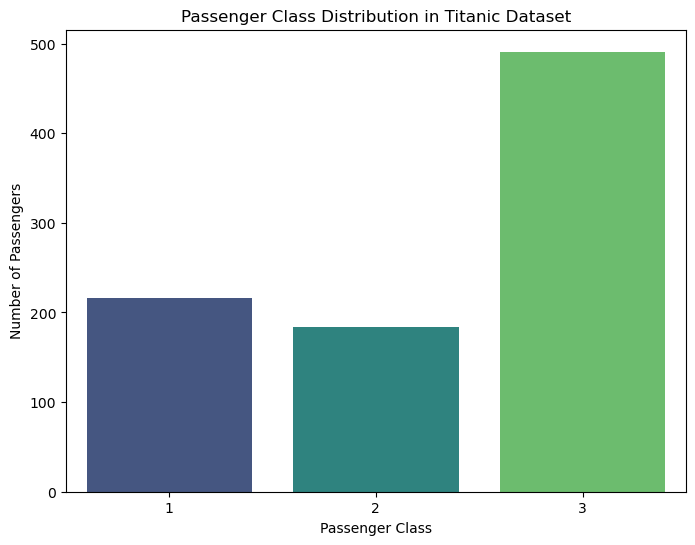

In [160]:
pclass_counts = train_df['Pclass'].value_counts()

plt.figure(figsize=(8, 6))

sns.barplot(x=pclass_counts.index, y=pclass_counts.values, palette='viridis')

plt.title('Passenger Class Distribution in Titanic Dataset')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')

plt.show()

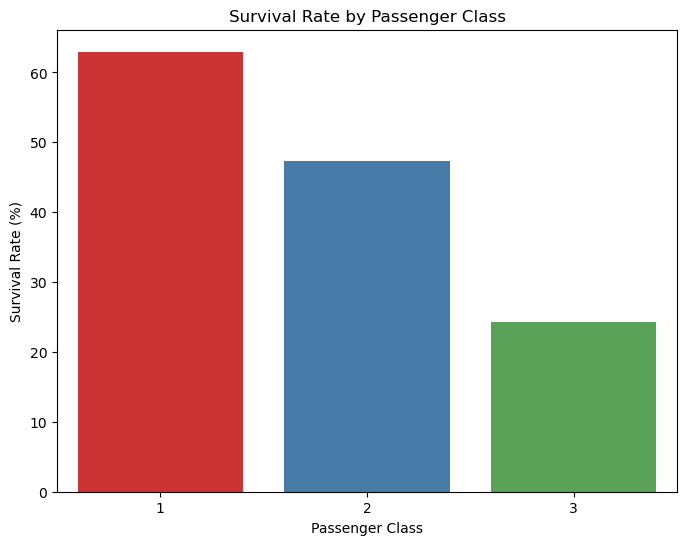

In [161]:
survival_rates = train_df.groupby('Pclass')['Survived'].mean() * 100

plt.figure(figsize=(8, 6))

sns.barplot(x=survival_rates.index, y=survival_rates.values, palette='Set1')

plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')

plt.show()

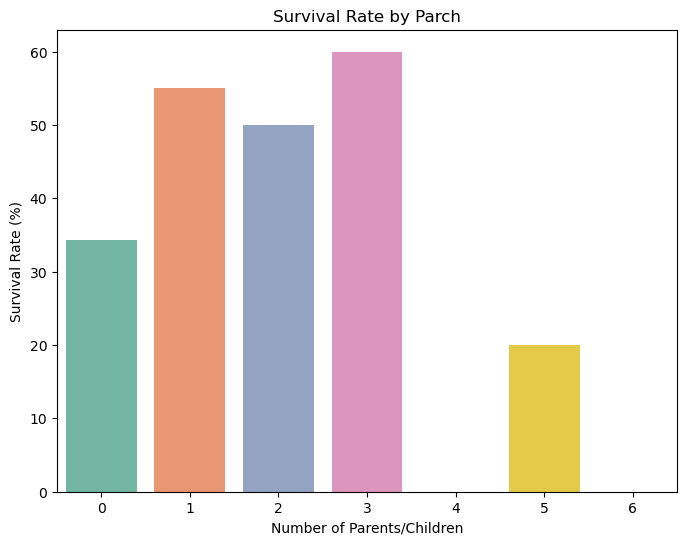

In [162]:

survival_rates = df_num.groupby('Parch')['Survived'].mean() * 100

plt.figure(figsize=(8, 6))

sns.barplot(x=survival_rates.index, y=survival_rates.values, palette='Set2')

plt.title('Survival Rate by Parch')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Survival Rate (%)')

plt.show()

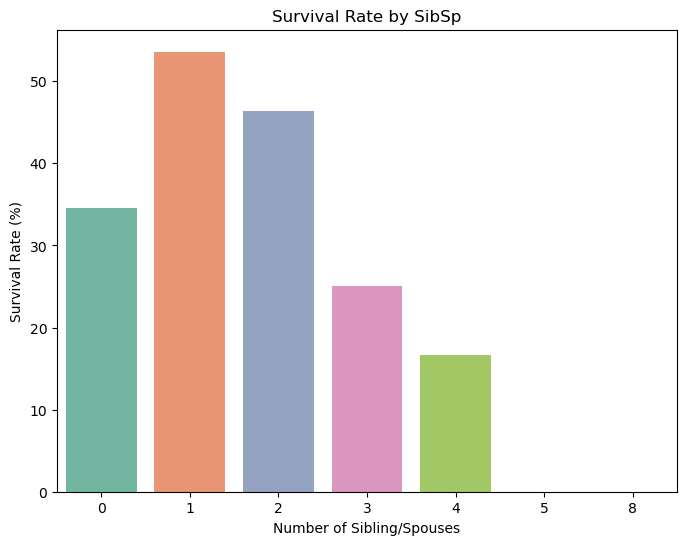

In [163]:

survival_rates = df_num.groupby('SibSp')['Survived'].mean() * 100

plt.figure(figsize=(8, 6))

sns.barplot(x=survival_rates.index, y=survival_rates.values, palette='Set2')

plt.title('Survival Rate by SibSp')
plt.xlabel('Number of Sibling/Spouses')
plt.ylabel('Survival Rate (%)')

plt.show()

C:\Users\bll42\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


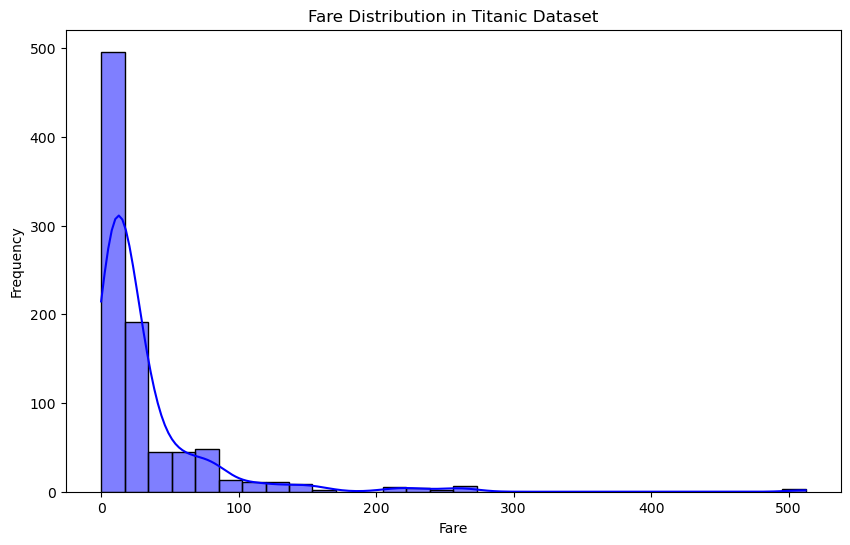

In [164]:
fare_data = df_num['Fare'].dropna()
plt.figure(figsize=(10, 6))

sns.histplot(fare_data, kde=True, color='blue', bins=30)

plt.title('Fare Distribution in Titanic Dataset')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.show()

C:\Users\bll42\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


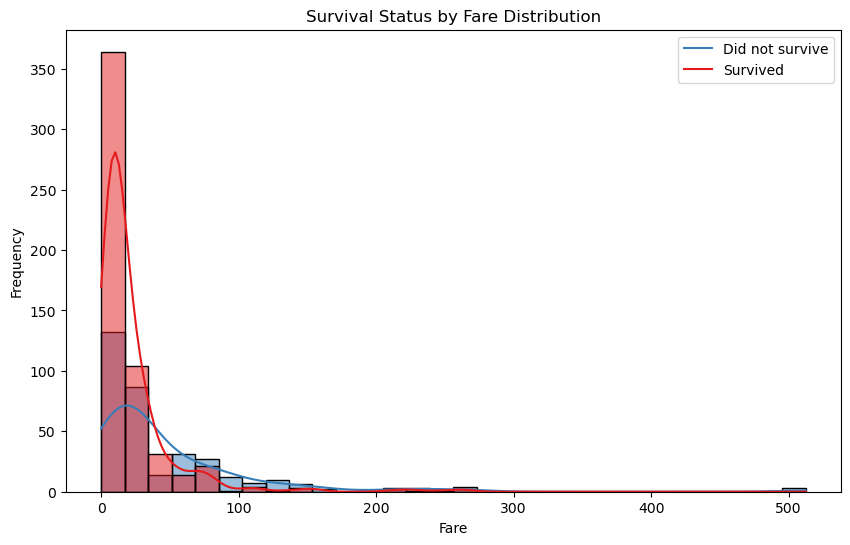

In [165]:

plt.figure(figsize=(10, 6))

sns.histplot(data=df_num, x='Fare', hue='Survived', kde=True, palette='Set1', bins=30)

plt.title('Survival Status by Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.legend(labels=['Did not survive', 'Survived'])

plt.show()

C:\Users\bll42\AppData\Local\Temp\ipykernel_16268\2399072372.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num['Age'], label = 'Skewness: %.2f'%(df_num['Age'].skew()))
C:\Users\bll42\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Passenger Age Distribution')

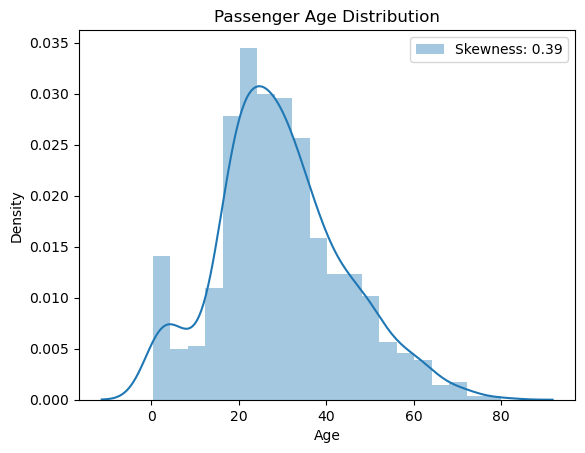

In [166]:

sns.distplot(df_num['Age'], label = 'Skewness: %.2f'%(df_num['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

C:\Users\bll42\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bll42\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

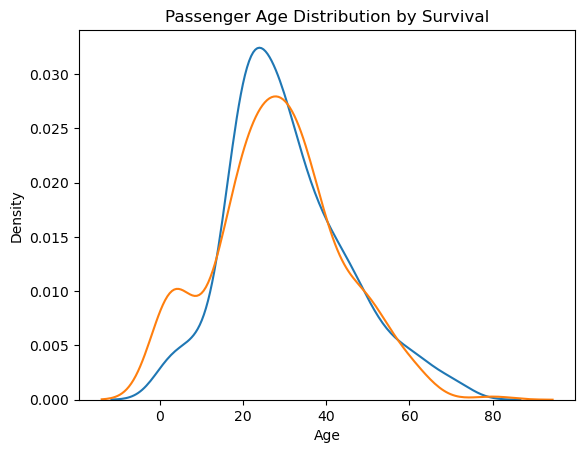

In [167]:
sns.kdeplot(df_num['Age'][df_num['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(df_num['Age'][df_num['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

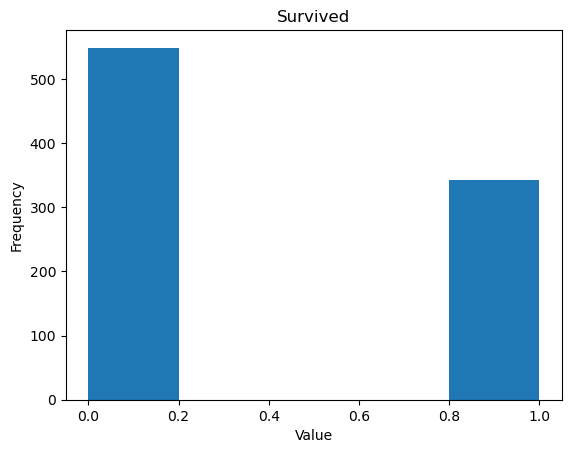

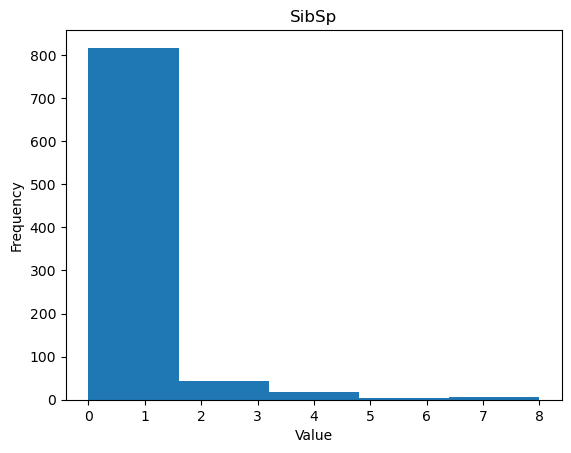

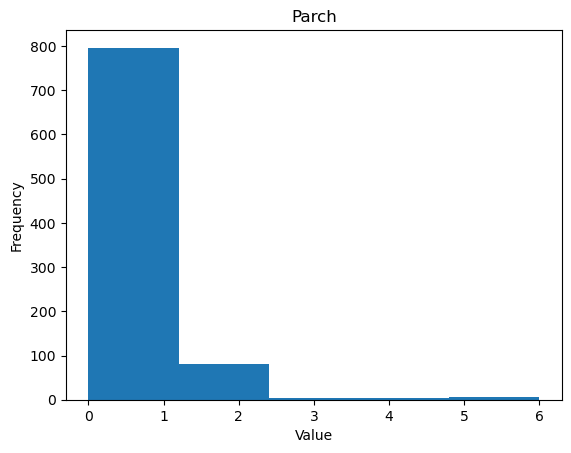

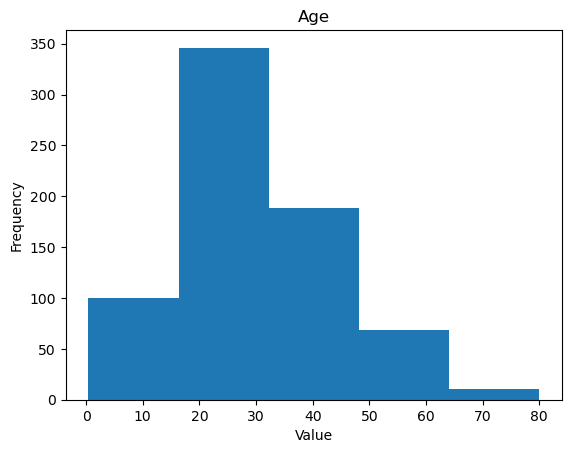

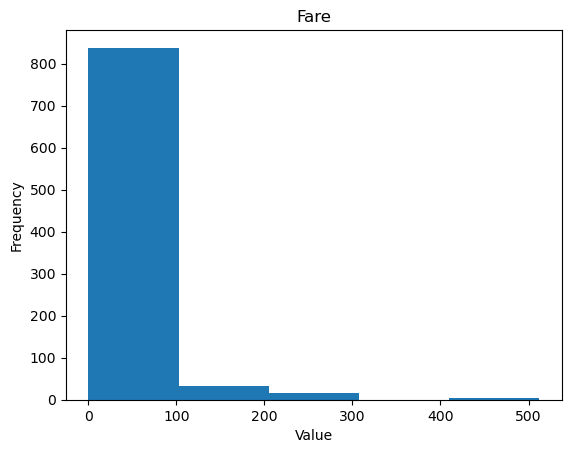

In [168]:
#histograms without normalizing
for column in df_num.columns:
    plt.hist(df_num[column], bins = 5, label=column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(column)
    plt.show()

          Survived     SibSp     Parch       Age      Fare
Survived  1.000000 -0.035322  0.081629 -0.077221  0.257307
SibSp    -0.035322  1.000000  0.414838 -0.308247  0.159651
Parch     0.081629  0.414838  1.000000 -0.189119  0.216225
Age      -0.077221 -0.308247 -0.189119  1.000000  0.096067
Fare      0.257307  0.159651  0.216225  0.096067  1.000000


<Axes: >

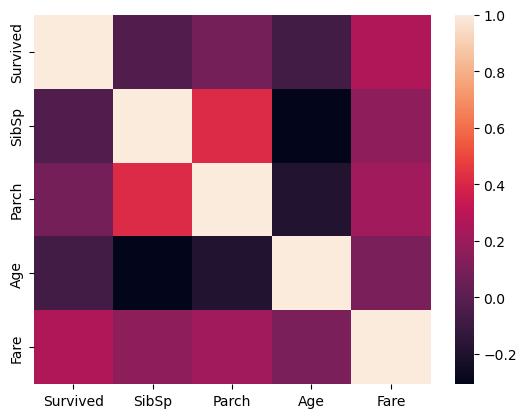

In [169]:
#heatmap - correlation between variables

print(df_num.corr())
sns.heatmap(df_num.corr())

In [170]:
#normalizing columns in df_num

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_num_normalized = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)


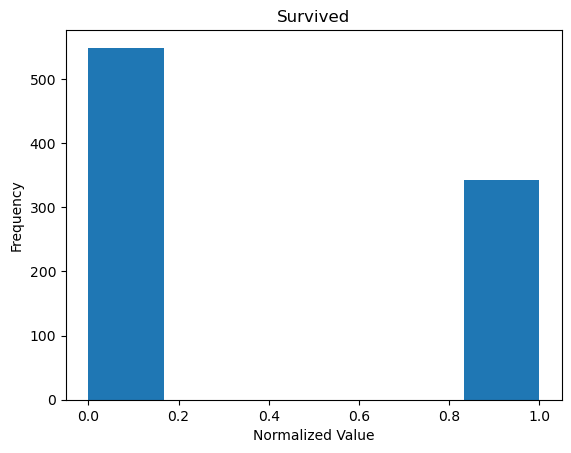

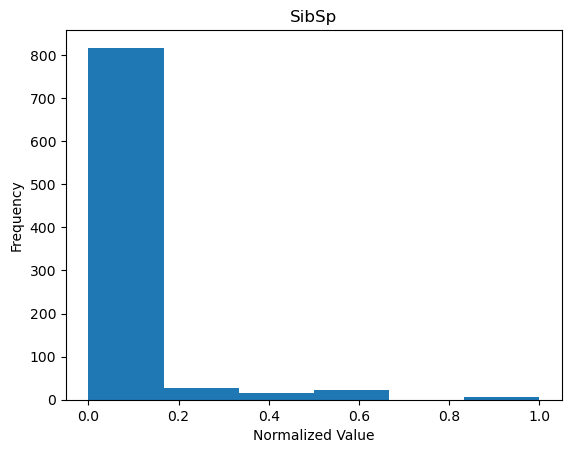

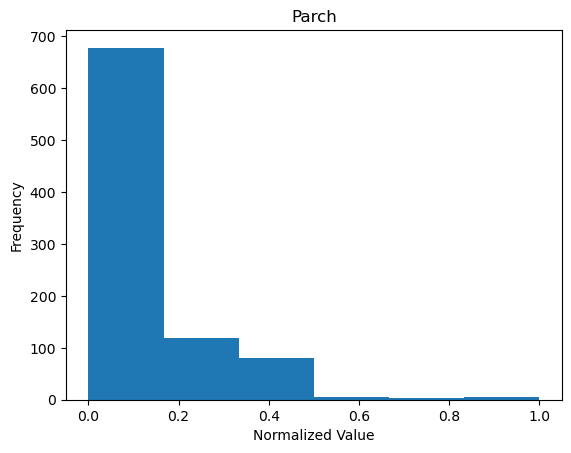

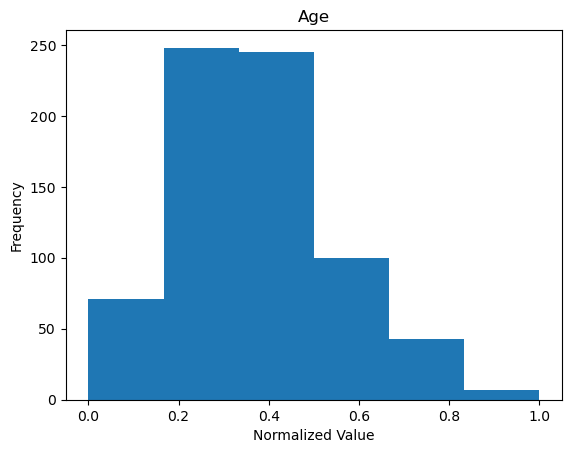

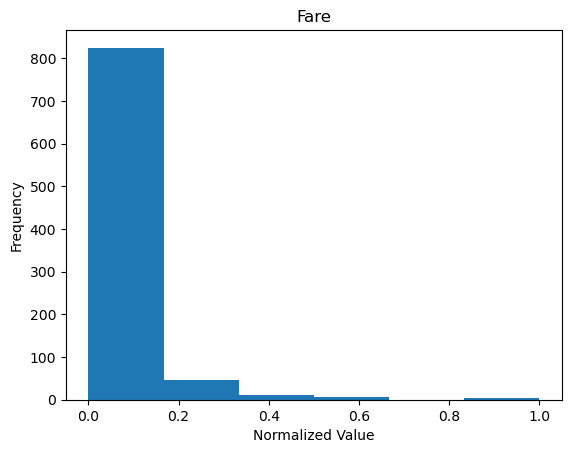

In [171]:
#plot histogram of normalized columns
for column in df_num_normalized.columns:
    plt.hist(df_num_normalized[column], bins = 6, label=column)
    plt.xlabel('Normalized Value')
    plt.ylabel('Frequency')
    plt.title(column)
    plt.show()

          Survived     SibSp     Parch       Age      Fare
Survived  1.000000 -0.035322  0.081629 -0.077221  0.257307
SibSp    -0.035322  1.000000  0.414838 -0.308247  0.159651
Parch     0.081629  0.414838  1.000000 -0.189119  0.216225
Age      -0.077221 -0.308247 -0.189119  1.000000  0.096067
Fare      0.257307  0.159651  0.216225  0.096067  1.000000


<Axes: >

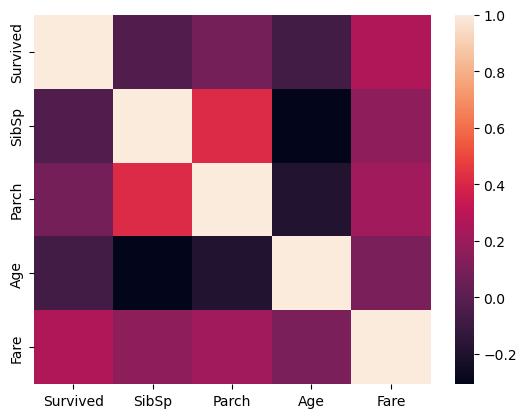

In [172]:
#heatmap - correlation between variables

print(df_num.corr())
sns.heatmap(df_num.corr())

In [173]:
#working copies
train_df_copy = train_df.copy()
test_df_copy = test_df.copy() #dropping the same columns to be consistent
df_num_copy = df_num.copy()
df_cat_copy = df_cat.copy()

In [174]:
#drop null Embarked - only 2 rows
train_df_copy.dropna(subset=['Embarked'], inplace = True)

In [175]:
#fill missing values in Age - replace with median of the data
train_df_copy['Age'] = train_df_copy['Age'].fillna(train_df['Age'].median())
train_df_copy.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [176]:
#remove Name, Cabin, Ticket
train_df.head()
train_df_copy.drop(['Name', 'Cabin', 'Ticket'], axis = 1, inplace = True  )

In [177]:
# encode categorical data
train_df_copy = pd.get_dummies(train_df_copy, columns=['Embarked', 'Sex'], drop_first = False)

In [178]:
df_num_copy = train_df_copy[['Age','SibSp','Parch','Fare']]

scaler = MinMaxScaler()

train_df_copy[df_num_copy.columns] = scaler.fit_transform(df_num_copy)

It is neccesary to do the same for test dataframe, so the columns will match  

In [179]:
train_df_copy.head(10)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,0.271174,0.125,0.000000,0.014151,False,False,True,False,True
1,2,1,1,0.472229,0.125,0.000000,0.139136,True,False,False,True,False
2,3,1,3,0.321438,0.000,0.000000,0.015469,False,False,True,True,False
3,4,1,1,0.434531,0.125,0.000000,0.103644,False,False,True,True,False
4,5,0,3,0.434531,0.000,0.000000,0.015713,False,False,True,False,True
5,6,0,3,0.346569,0.000,0.000000,0.016510,False,True,False,False,True
6,7,0,1,0.673285,0.000,0.000000,0.101229,False,False,True,False,True
7,8,0,3,0.019854,0.375,0.166667,0.041136,False,False,True,False,True
8,9,1,3,0.334004,0.000,0.333333,0.021731,False,False,True,True,False
9,10,1,2,0.170646,0.125,0.000000,0.058694,True,False,False,True,False


In [180]:
print(list(train_df_copy.columns))

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male']


In [181]:
train_df_copy.to_csv('filename.csv', index=False)